You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('./data.csv' , names = ["10th" , "12th"  , "cgpa" , "automata" , "automata_fix" ,"computer sc","computer sc perc" , "writex" , "logitcal" ,  "logical perc" , "computer programming" , "computer programming perc" , "Quant" , "Quant perc" , "English" , "English Perc" , "total" , "y_label" ])

In [6]:
data.head(5)

,10th,12th,cgpa,automata,automata_fix,computer sc,computer sc perc,writex,logitcal,logical perc,computer programming,computer programming perc,Quant,Quant perc,English,English Perc,total,y_label
0,88.00,73.0,7.01,0,0,377,49.04,2,505,65.40,455,68.23,490,48.27,675,97.72,4374.09,NaN
1,87.00,71.0,7.46,20,15,315,30.15,3,505,65.40,425,58.53,520,58.60,685,98.21,4794.14,NaN
2,84.00,74.4,6.40,38,29,438,67.87,2,395,24.41,425,58.53,415,24.33,615,91.92,4734.20,NaN
3,95.00,77.0,7.10,0,0,438,67.87,3,460,48.03,415,55.14,340,8.89,665,97.13,4469.90,NaN
4,78.83,80.0,7.28,13,15,285,22.36,3,445,42.15,365,38.14,575,75.67,360,12.51,4316.99,NaN


In [7]:
data.shape


(1993, 18)

In [ ]:
data.shape
data["total"] = data["total"].astype(float) data["y_label"][data.total > 4500] = 1
data["y_label"][data.total <= 4500] = 0


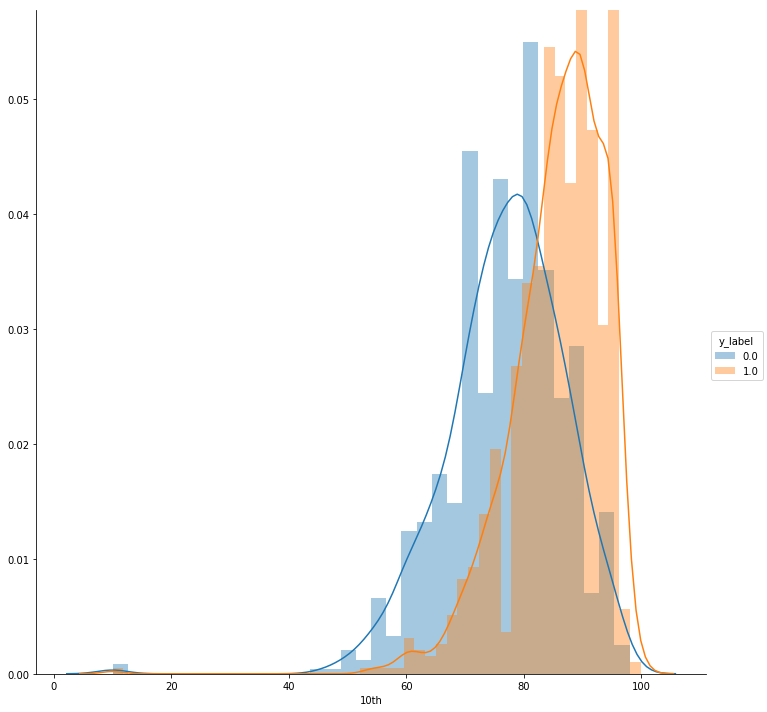

In [116]:
sns.FacetGrid(data , hue = "y_label", size = 10).map(sns.distplot, "10th").add_legend()
plt.show()

Observation
1.as the above univariate analysis says 10th data is helpful in prediction of y_labels
2.Those students who have more than 75% marks have greater chances of getting placed

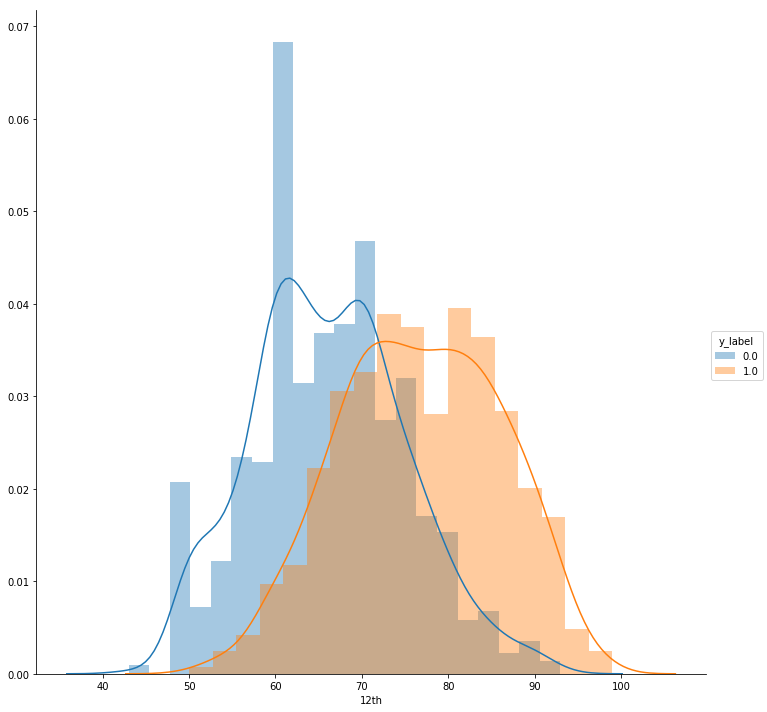

In [117]:
sns.FacetGrid(data , hue = "y_label", size = 10).map(sns.distplot, "12th").add_legend()
plt.show()

observation:
1. 12th percentage marks plays a significant role in the modeling
2. students who have greater than 65% marks are benifitted significantly

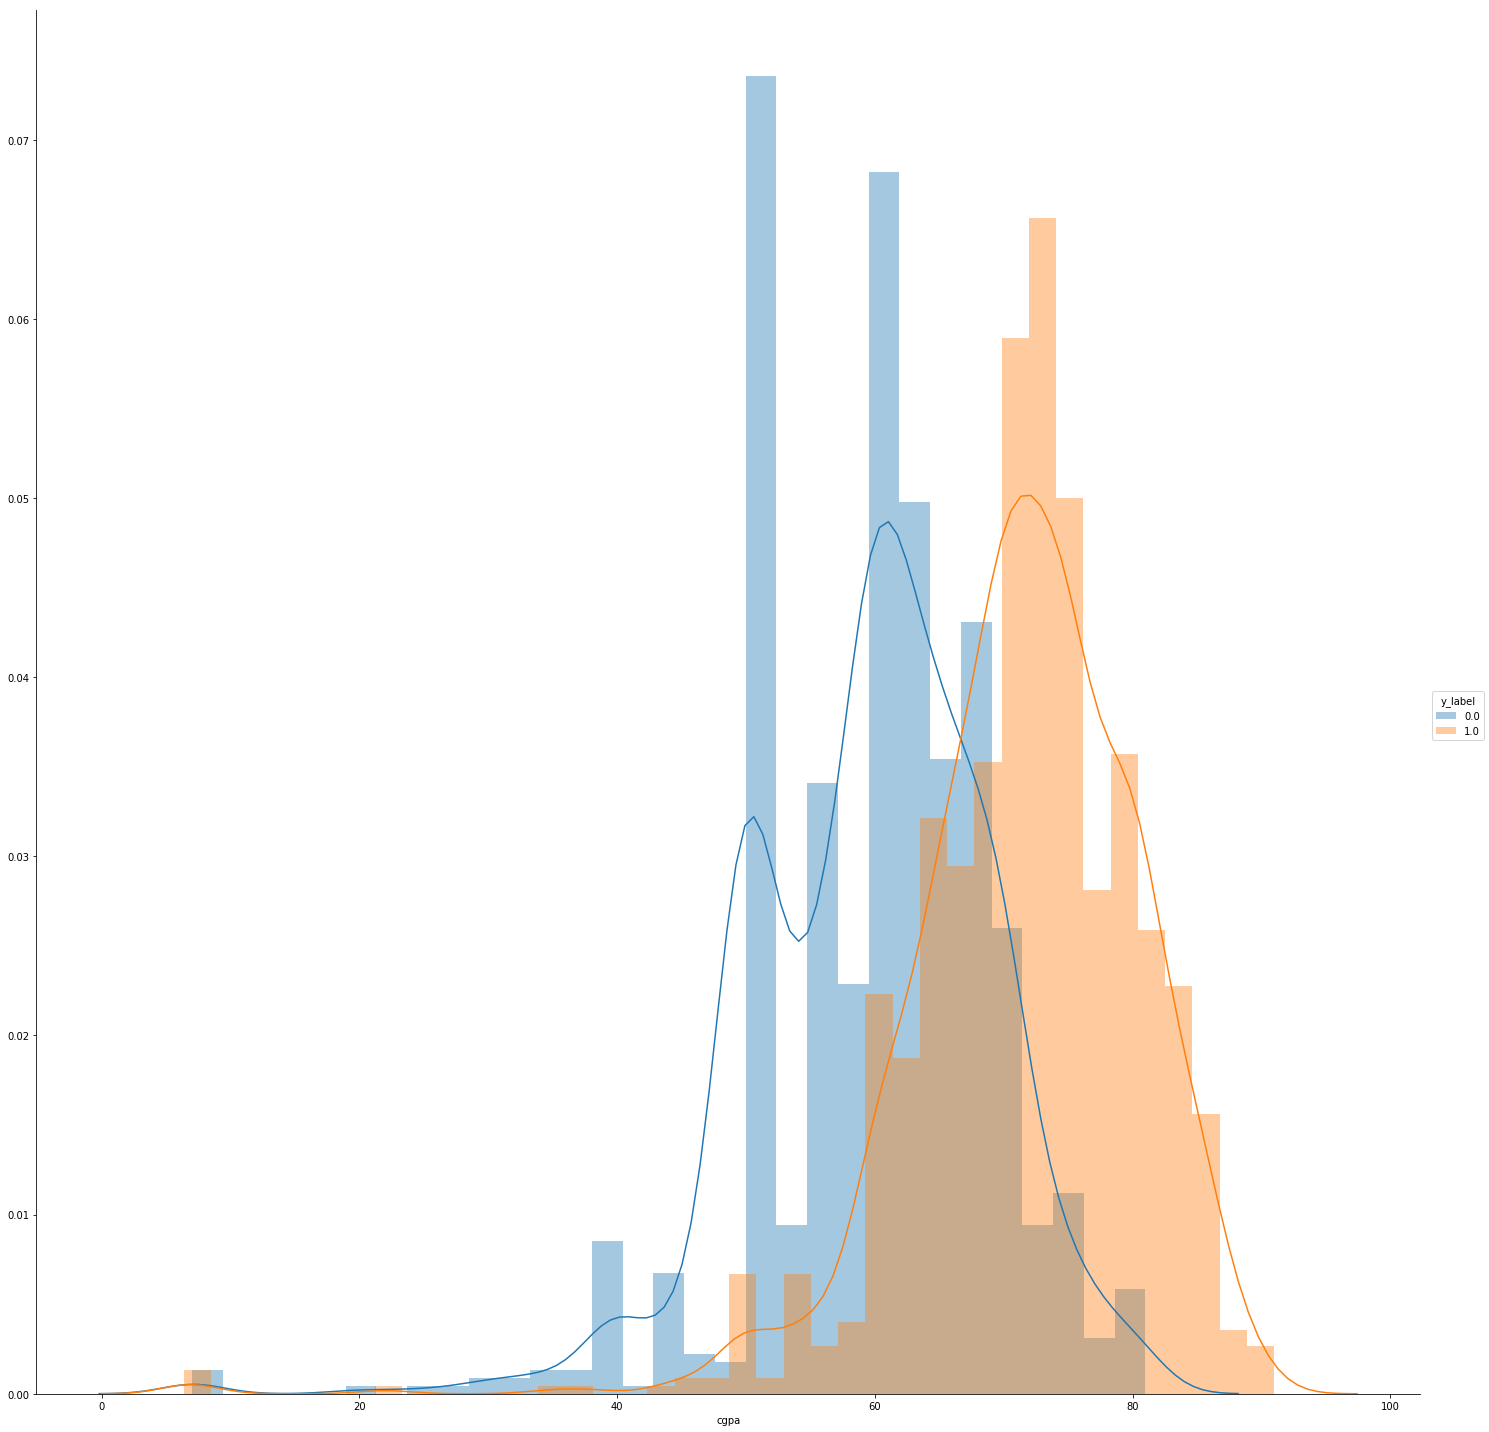

In [118]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "cgpa").add_legend()
plt.show()

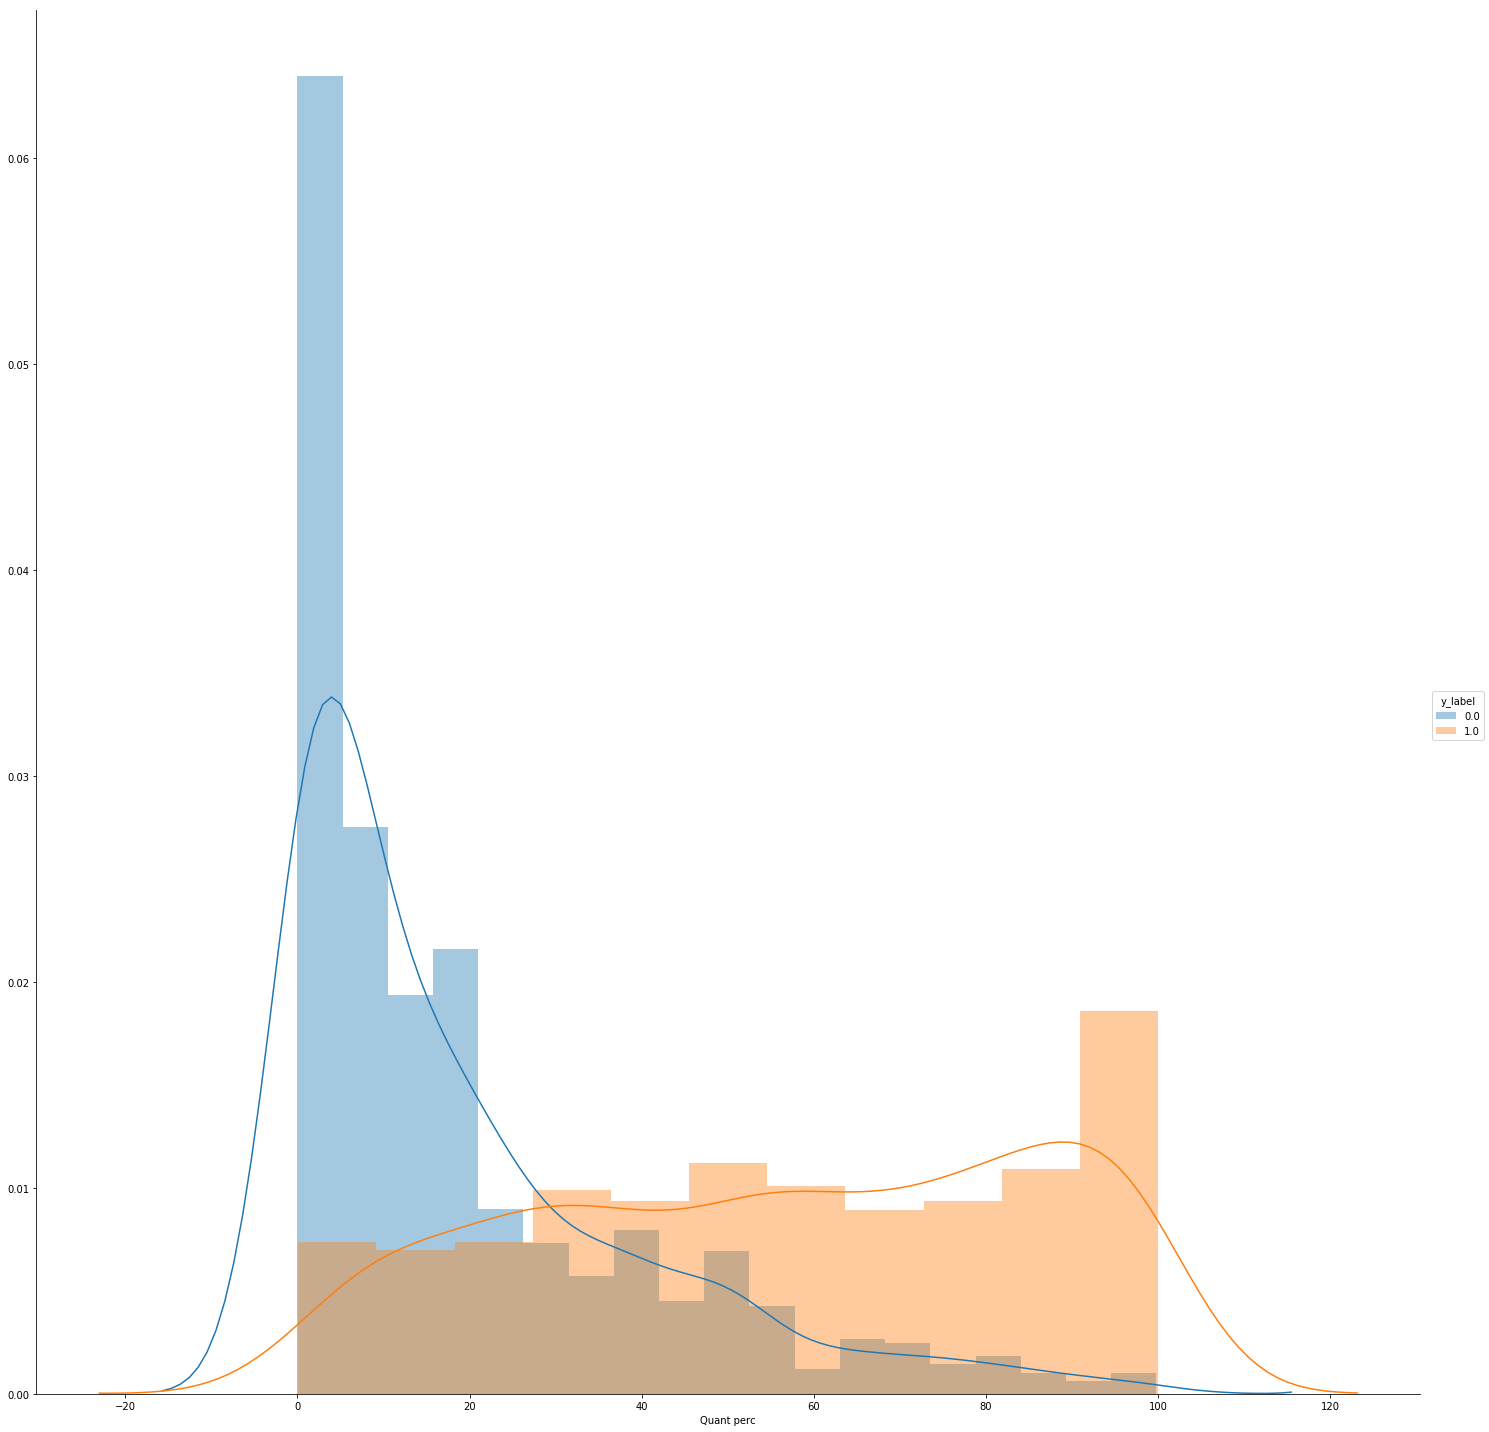

In [119]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "Quant perc").add_legend()
plt.show()

1. less precise in significant feature for prediction

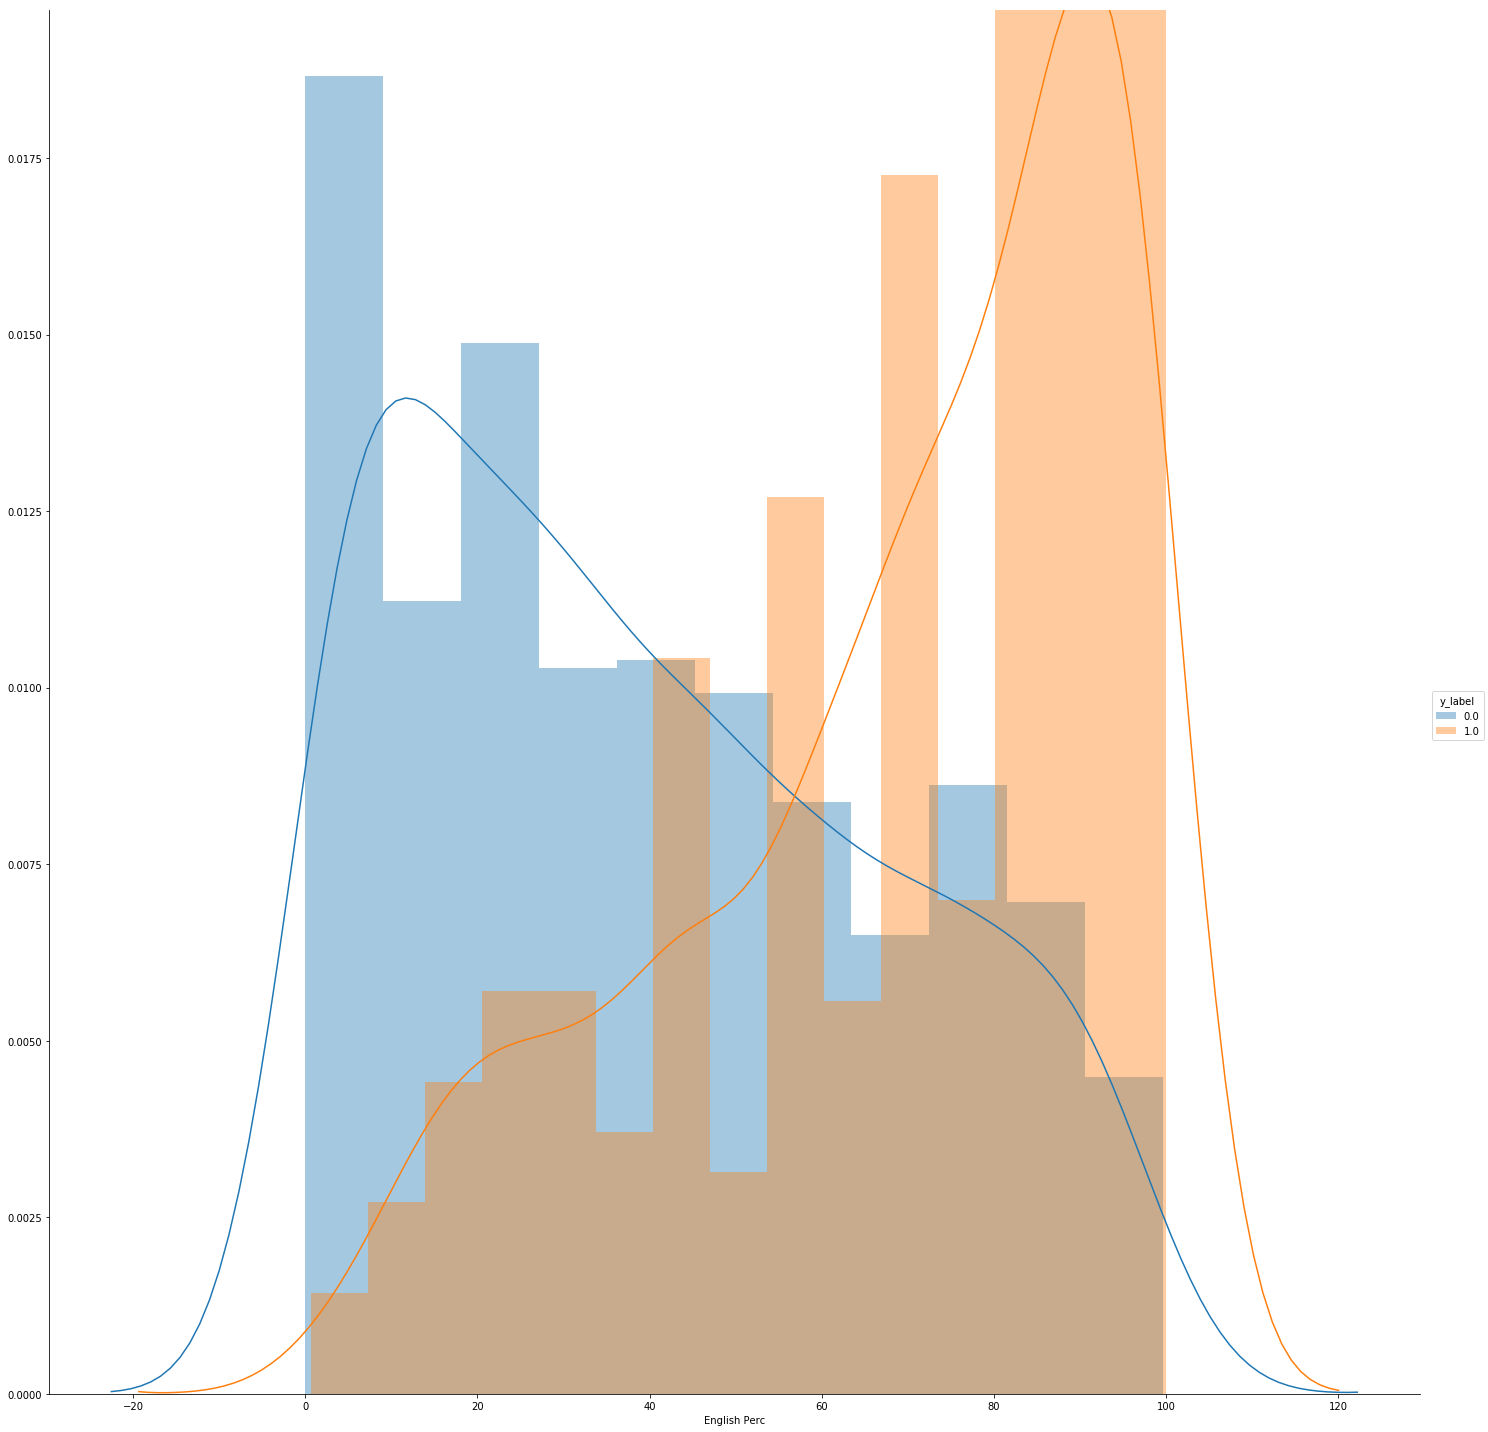

In [120]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "English Perc").add_legend()
plt.show()

1. less precise model hard to make sense out of it

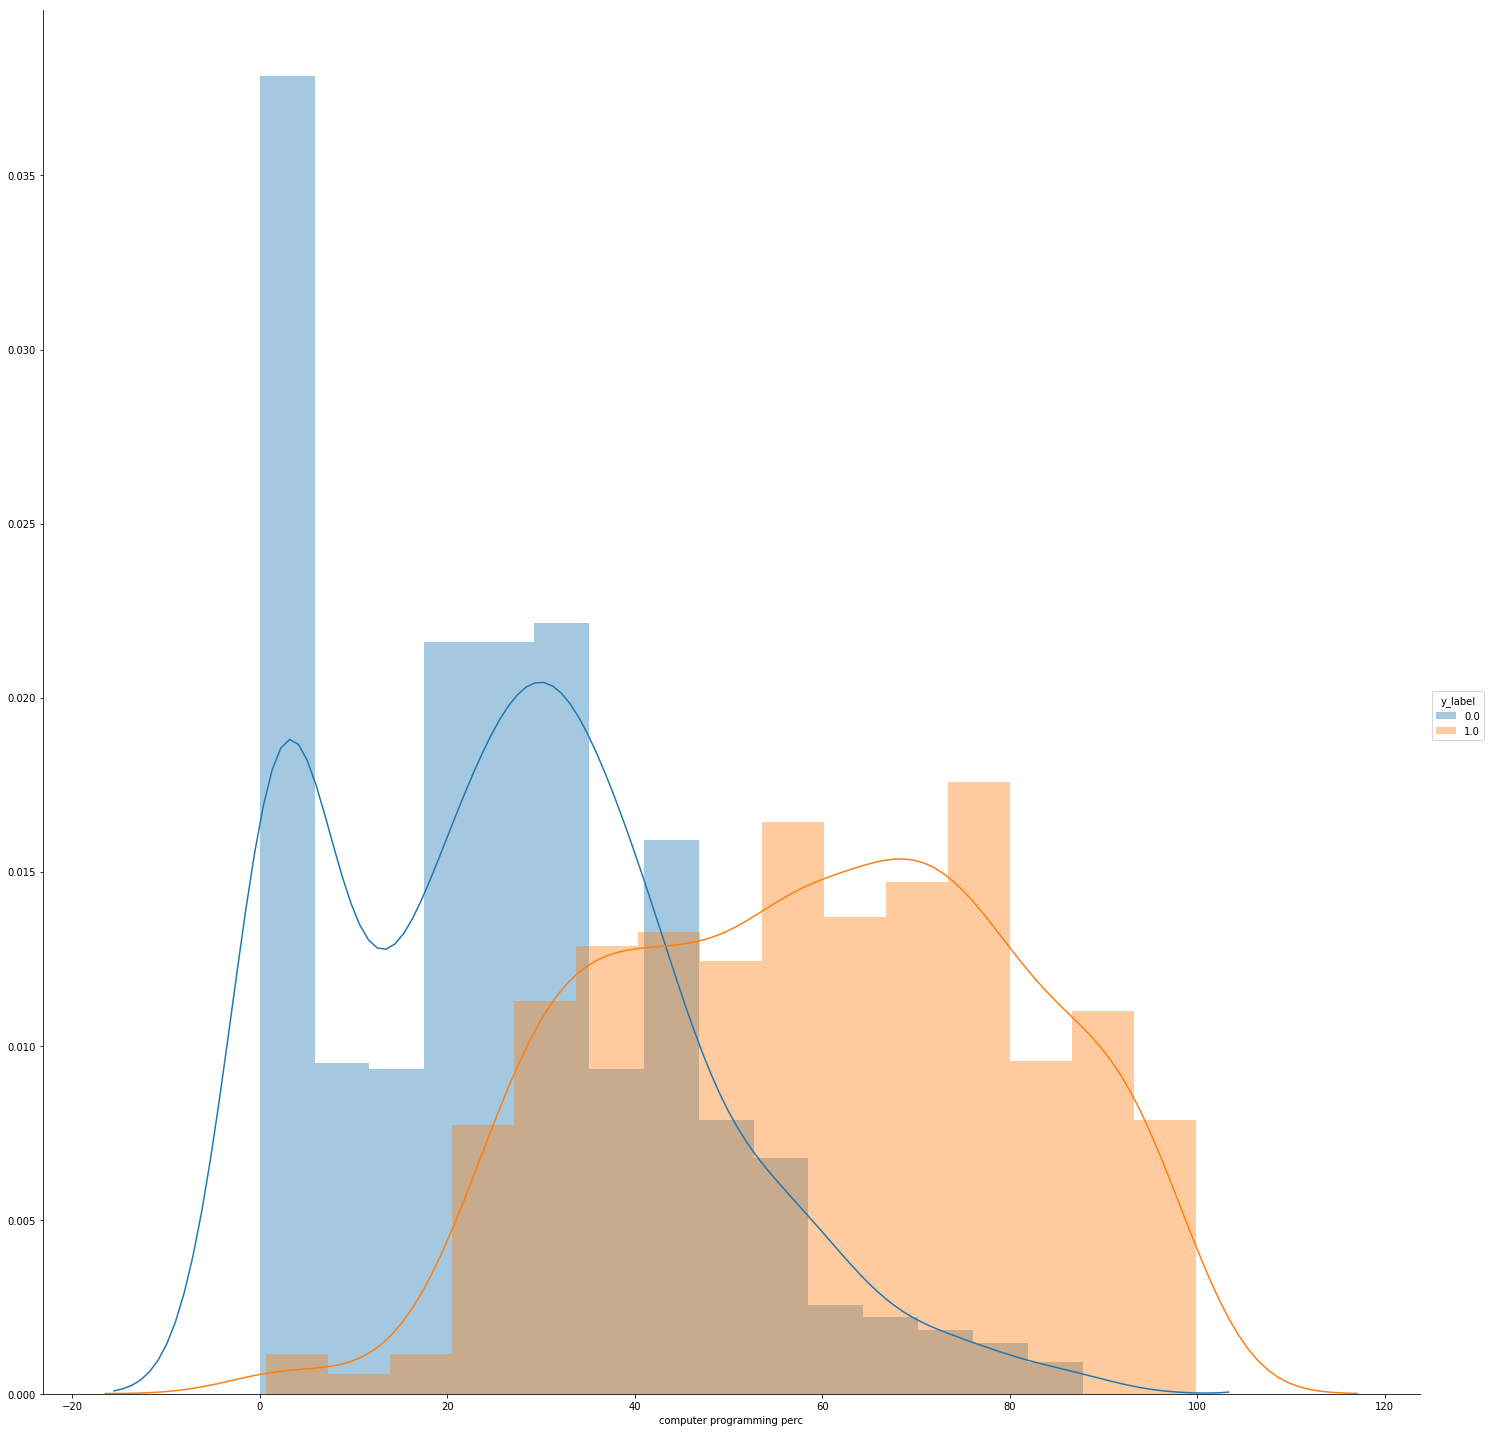

In [121]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "computer programming perc").add_legend()
plt.show()

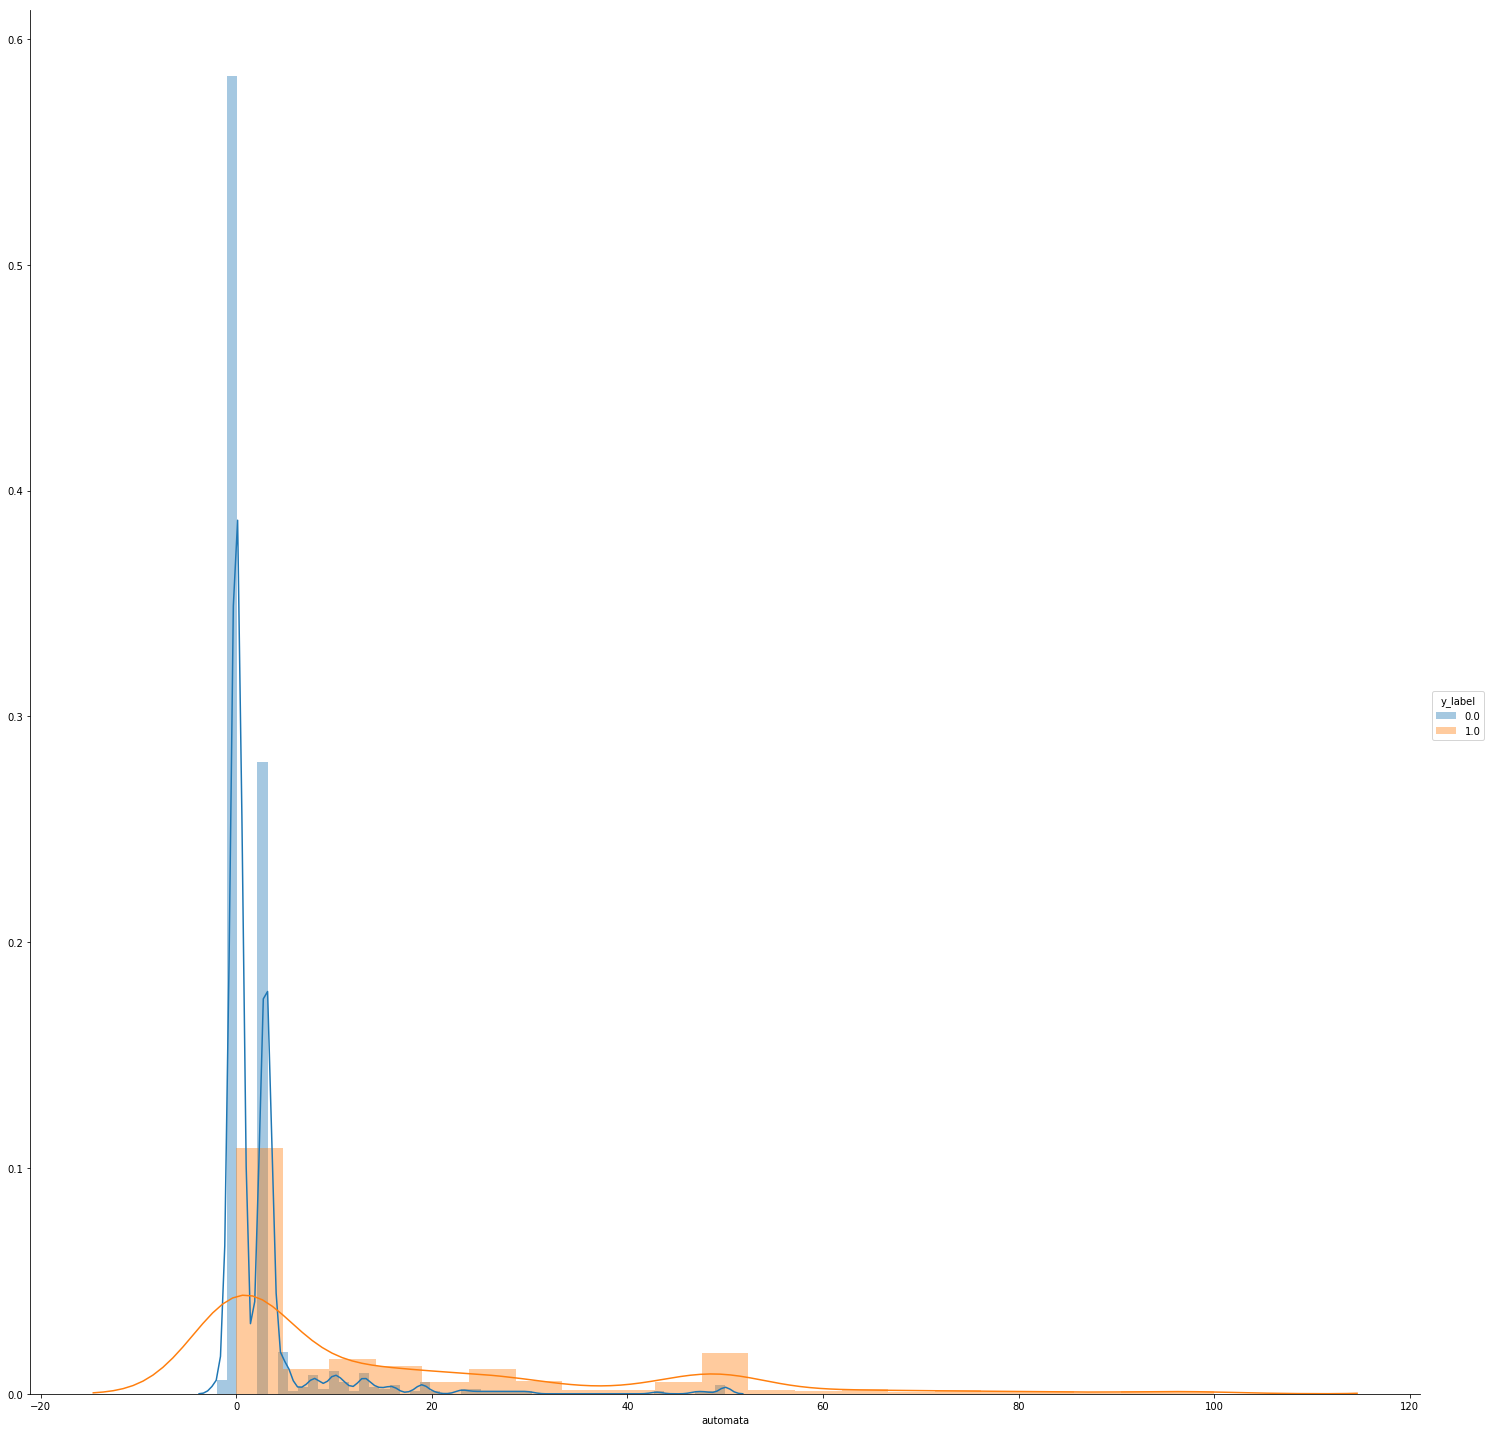

In [122]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "automata").add_legend()
plt.show()

1. this distribution follows the most of the pareto distribution in nature

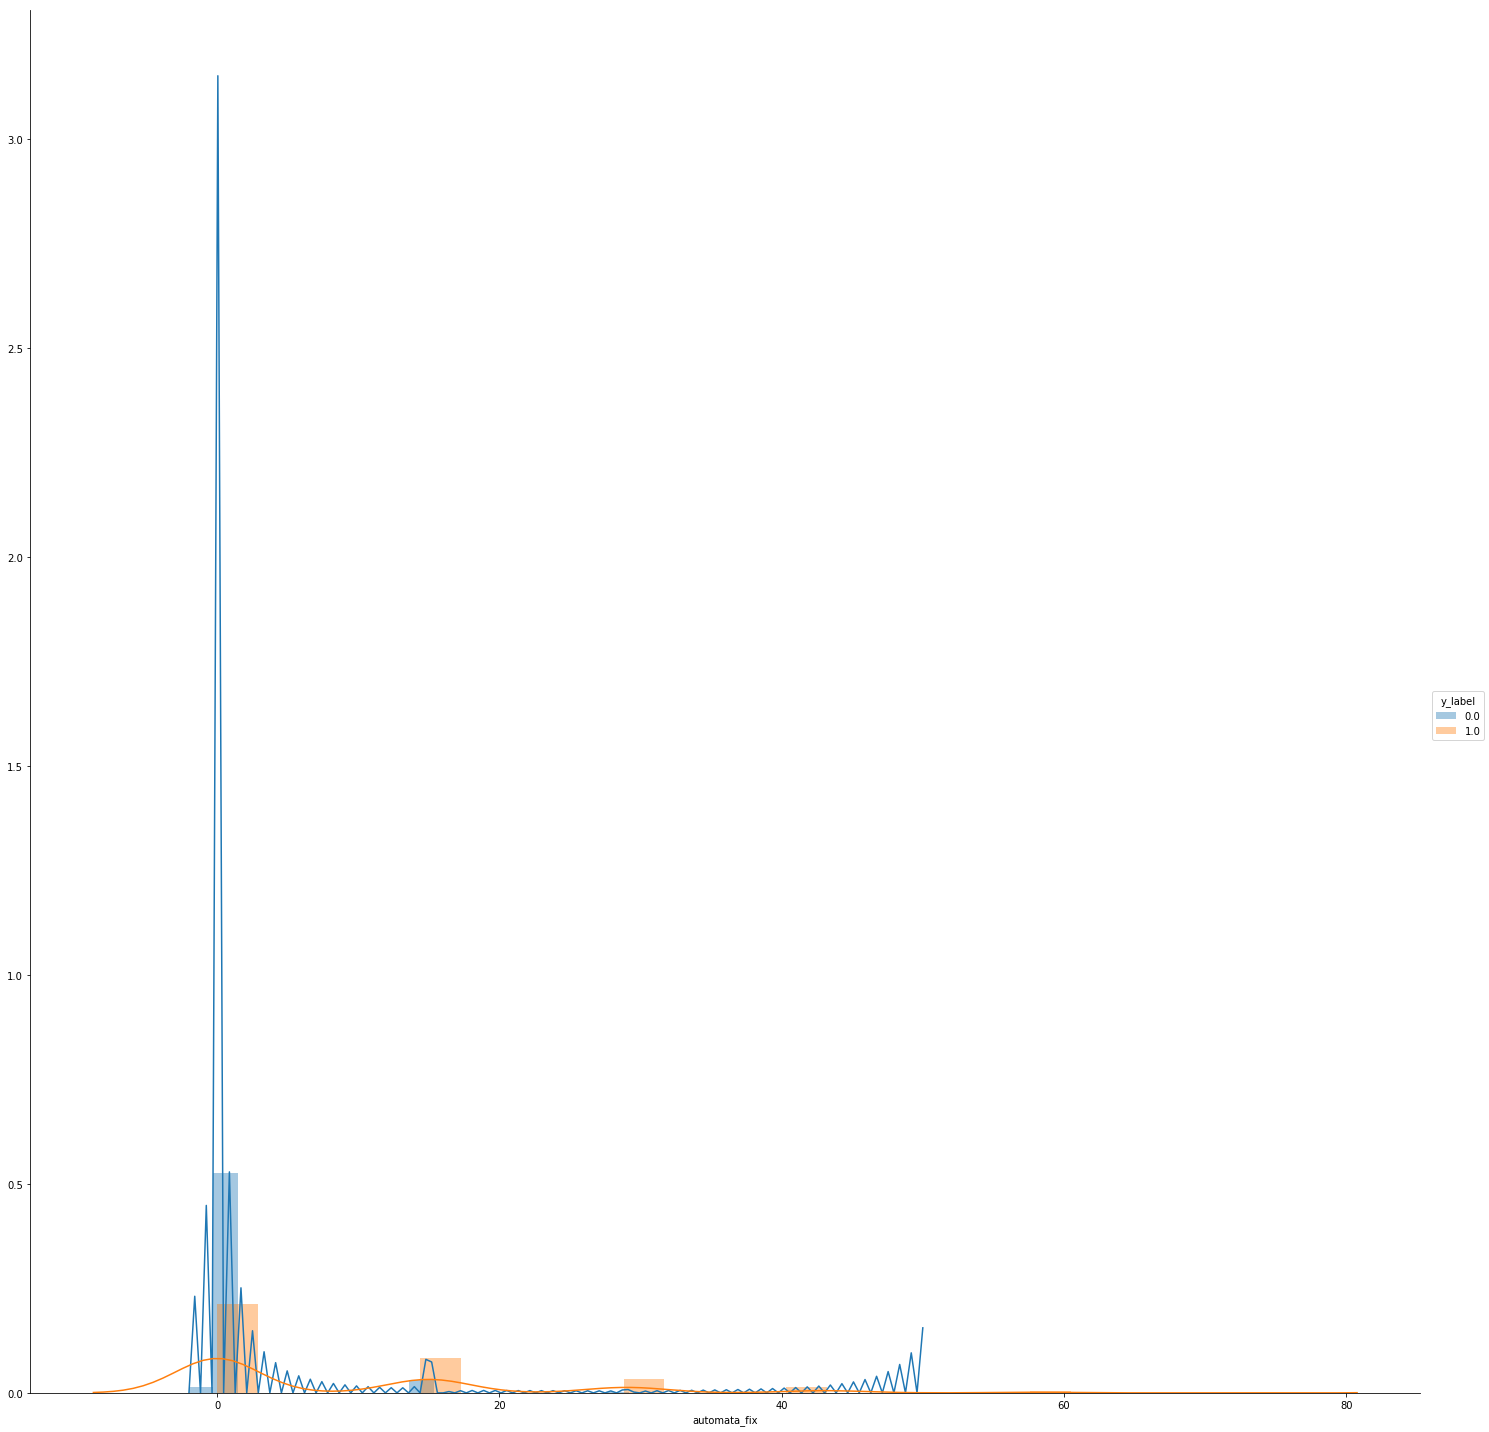

In [123]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "automata_fix").add_legend()
plt.show()

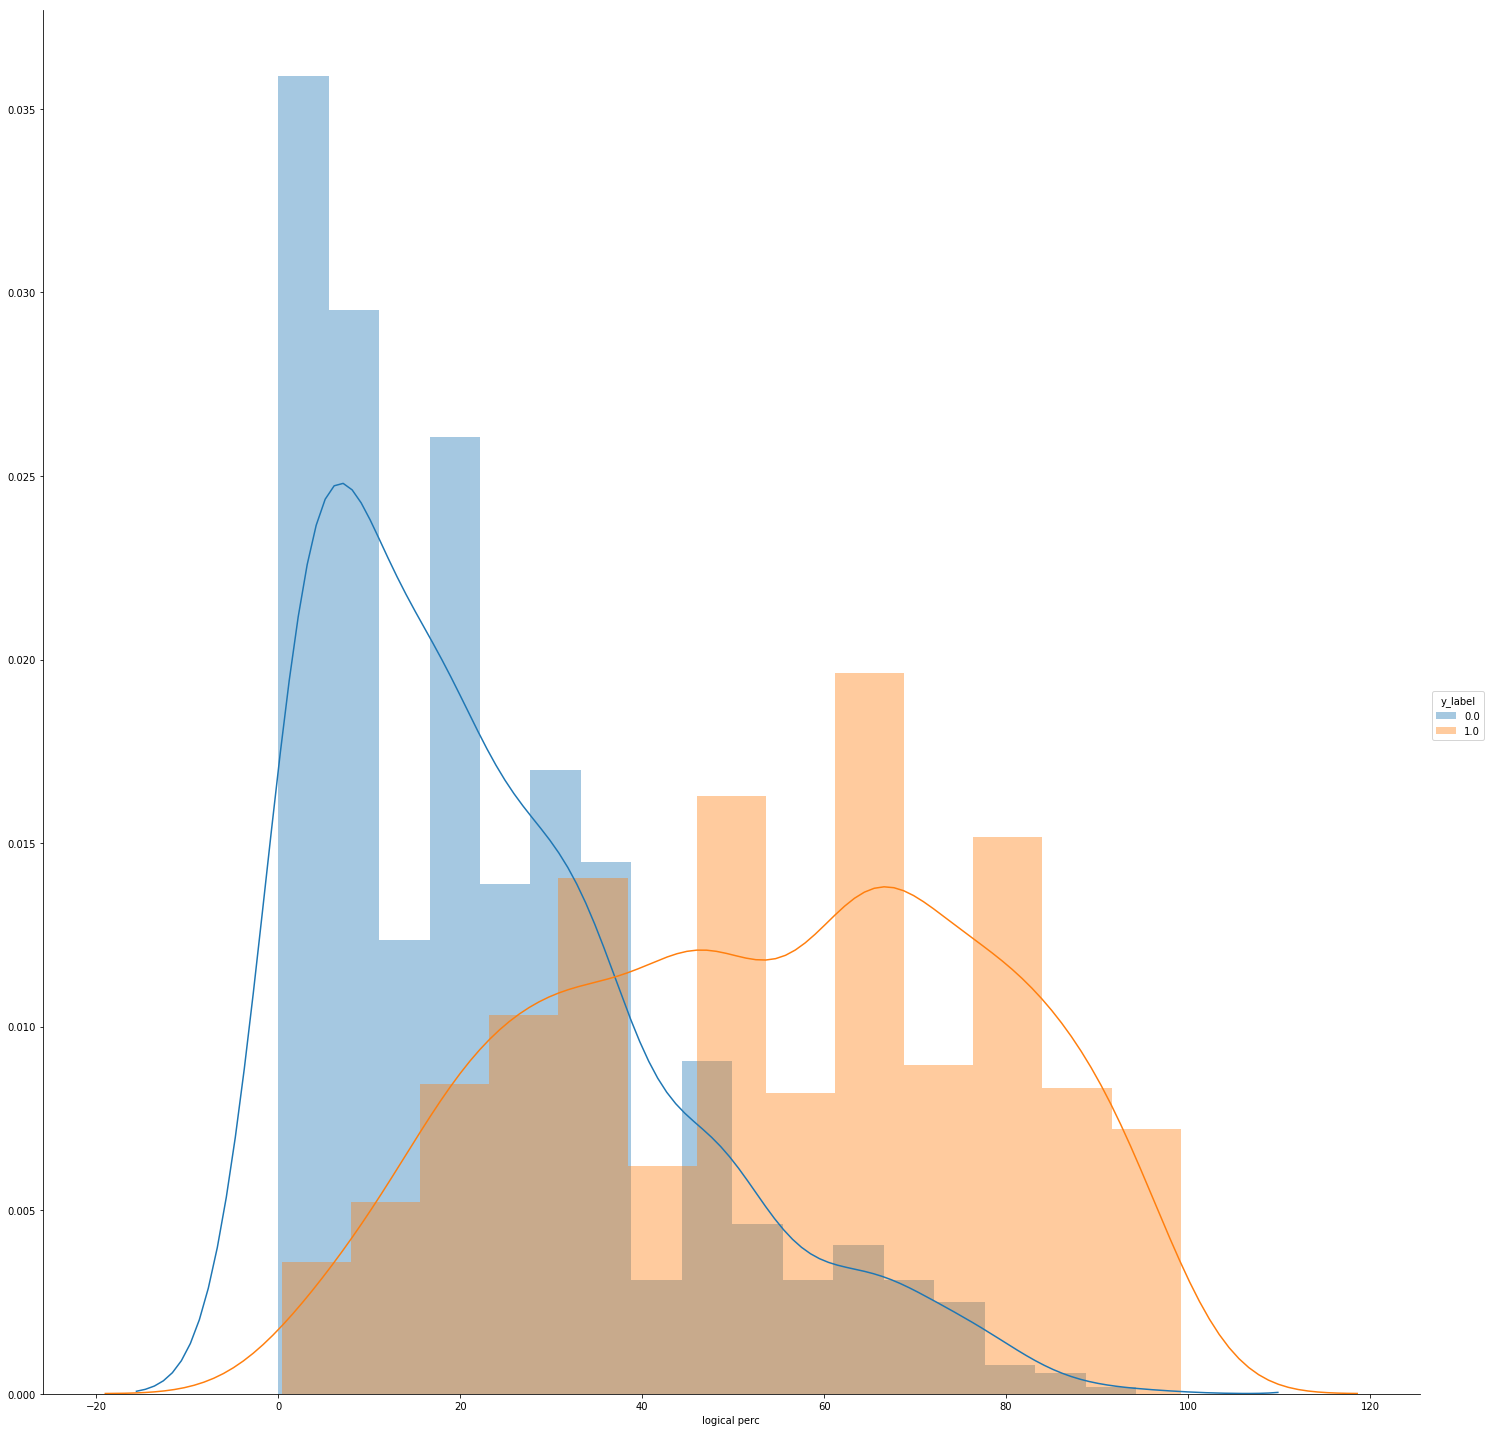

In [124]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "logical perc").add_legend()
plt.show()

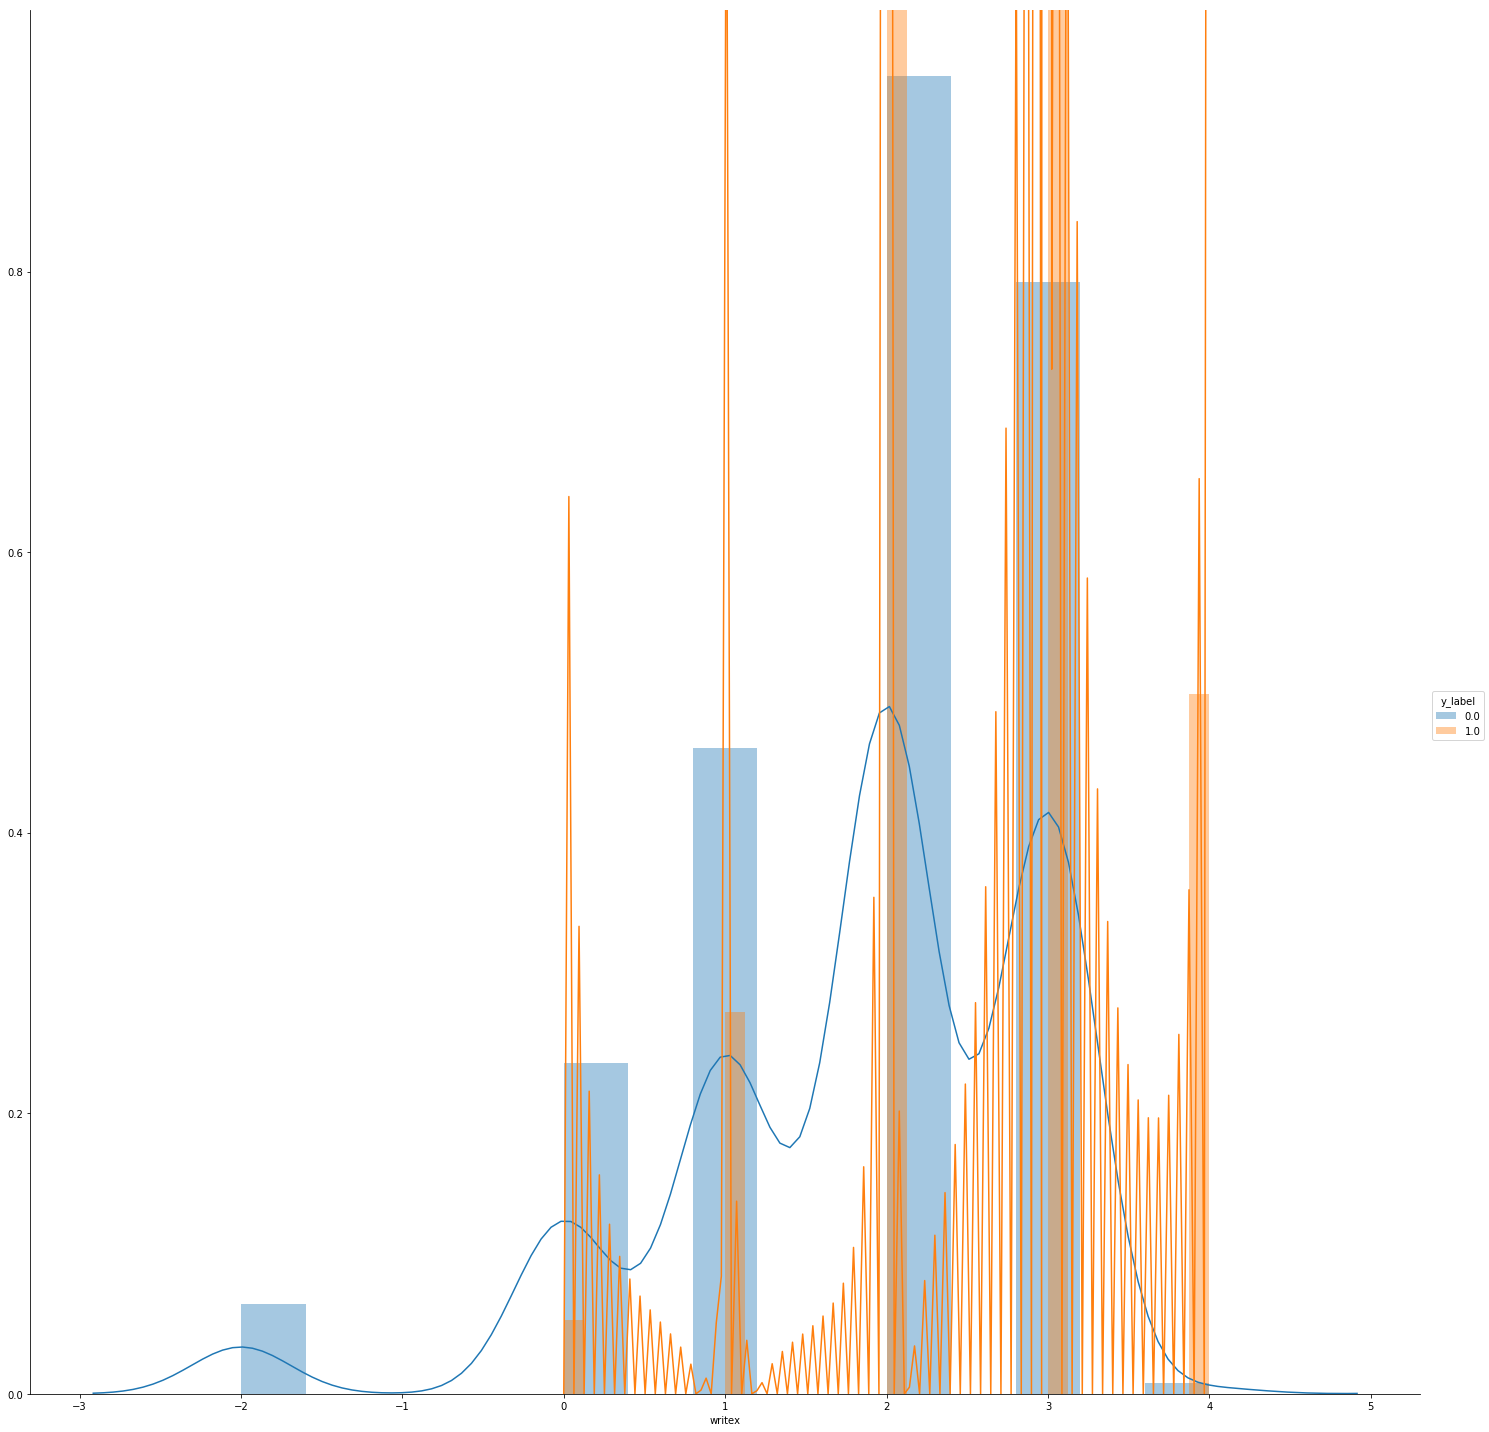

In [125]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "writex").add_legend()
plt.show()

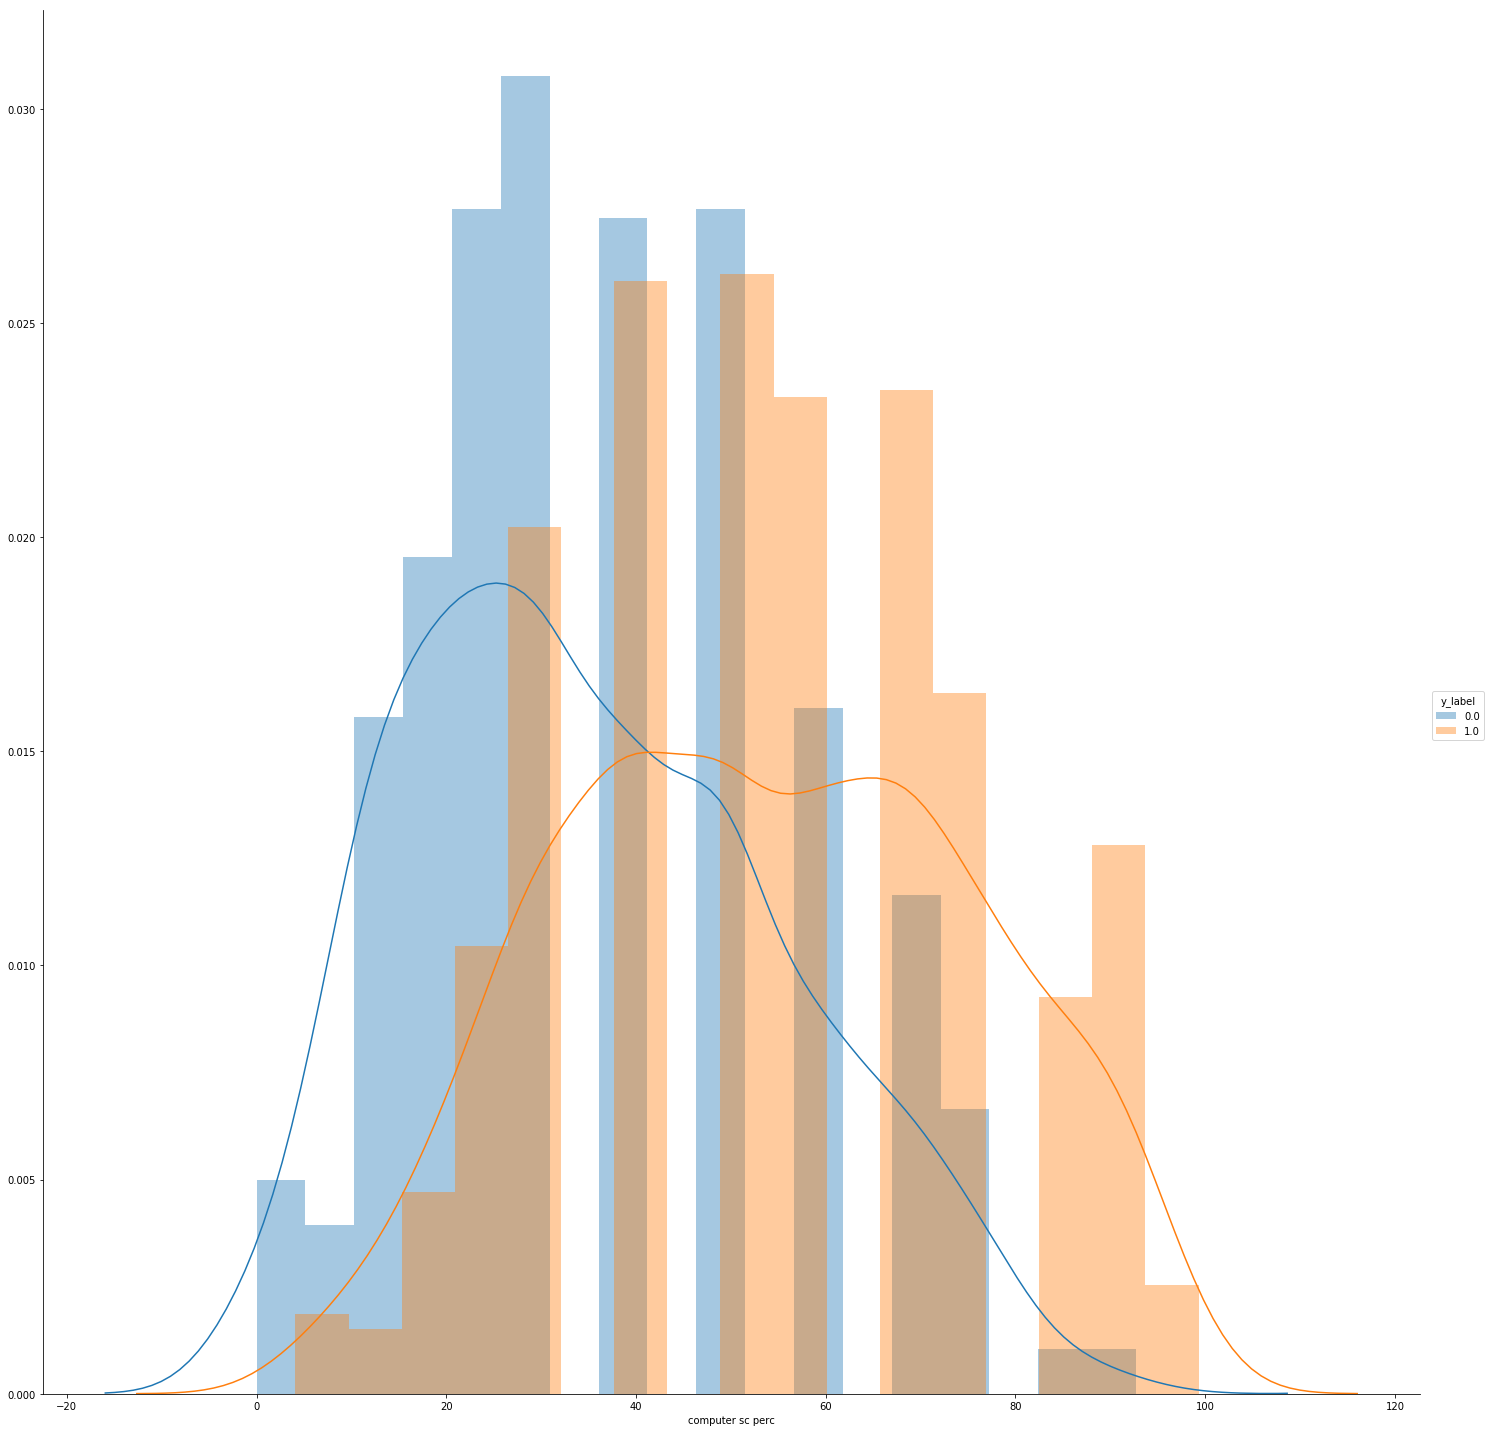

In [128]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "computer sc perc").add_legend()
plt.show()

In [9]:
X_train , X_test , Y_train , Y_test =train_test_split(data.iloc[:,0:16] , data.iloc[:,17] , test_size = 0.2 , random_state = 1)
X_train , X_cv , Y_train , Y_cv = train_test_split(X_train ,Y_train , test_size = 0.2 , random_state = 1)


In [169]:
index = 0 
max = 0
for i in range(1,100):
    model = knn(n_neighbors = i)
    model.fit(X_train , Y_train)
    y_predict = model.predict(X_cv)
    if score(Y_cv , y_predict) > max:
        index = i
        max = score(Y_cv , y_predict)
print("optimal value of k is " , index ,"At a accuracy of ", max , "after all the analysis and hyper parameter tunning of k -NN")


optimal value of k is  75 At a accuracy of  0.865203761755 after all the analysis and hyper parameter tunning of k -NN


In [171]:
model = knn(n_neighbors = 75)
model.fit(X_train , Y_train)
y_predict = model.predict(X_test)
print("After all the analysis and hyper parameter tunning we got the accuracy of " , score(Y_test , y_predict) , " on test data")

After all the analysis and hyper parameter tunning we got the accuracy of  0.87969924812  on test data
